# Importing and Exploring data (EDA)
## Check the shape
## Check types of values (Categorical or numerical)
## Check the number of NA values

## 1. Categorical Columns
> ### replace NA value
## 2. Numerical Columns
> ### replace NA value
> ### Outliers (by interactions with target variable)
> ### Multicolinearity

## Distribution of target variable



In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from scipy.stats import skew

In [54]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

train = train.drop(['Id'], axis = 1)
test = test.drop(["Id"], axis = 1)

df_all = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

train.shape, test.shape, df_all.shape

((1460, 80), (1459, 79), (2919, 79))

In [22]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [179]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Types of values (Categorical or numerical)

In [187]:
numericals = train.dtypes[train.dtypes != "object"].index
categoricals = train.dtypes[train.dtypes == "object"].index
print("numerical: {} cols,\ncategorical: {} cols,\noverall: {} cols ".
      format(len(numericals), len(categoricals), len(train.columns)))

numerical: 37 cols,
categorical: 43 cols,
overall: 80 cols 


# NA values

In [103]:
nan_cols_train = train.columns[train.isna().any()].tolist()
nan_cols_test  = test.columns[test.isna().any()].tolist()
nan_cols_all   = df_all.columns[df_all.isna().any()].tolist()

print("{} cols with NA in train".format(len(nan_cols_train)))
print("{} cols with NA in test".format(len(nan_cols_test)))
print("{} cols with NA in all".format(len(nan_cols_all)))

19 cols with NA in train
33 cols with NA in test
34 cols with NA in all


In [188]:
nan_nume = []
nan_cate = []
for col in nan_cols_all:
    if col in numericals:
        nan_nume.append(col)
    else: 
        nan_cate.append(col)
        
print("{} cols with NA in categorical".format(len(nan_cate)))
print(nan_cate)
print("\n")
print("{} cols with NA in numerical".format(len(nan_nume)))
print(nan_nume)

23 cols with NA in categorical
['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


11 cols with NA in numerical
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


## Numerical

In [143]:
for col in nan_nume:
    print(col, "-----------------------------------------")
    print("train: ", train[col].isna().sum())
    print("min: {}, max: {}, mean: {}, median: {}, mode {}".
          format(min(train[col]), max(train[col]), np.mean(train[col]), np.median(train[col]), train[col].mode()))
    print("\ntest: ", test[col].isna().sum())
    print("min: {}, max: {}, mean: {}, median: {}, mode {}".
          format(min(test[col]), max(test[col]), np.mean(test[col]), np.median(test[col]), test[col].mode()))
    print("\nall: ", df_all[col].isna().sum(), "\n")

LotFrontage -----------------------------------------
train:  259
min: 21.0, max: 313.0, mean: 70.04995836802665, median: nan, mode 0    60.0
dtype: float64

test:  227
min: 21.0, max: 200.0, mean: 68.58035714285714, median: nan, mode 0    60.0
dtype: float64

all:  486 

MasVnrArea -----------------------------------------
train:  8
min: 0.0, max: 1600.0, mean: 103.68526170798899, median: nan, mode 0    0.0
dtype: float64

test:  15
min: 0.0, max: 1290.0, mean: 100.70914127423822, median: nan, mode 0    0.0
dtype: float64

all:  23 

BsmtFinSF1 -----------------------------------------
train:  0
min: 0, max: 5644, mean: 443.6397260273973, median: 383.5, mode 0    0
dtype: int64

test:  1
min: 0.0, max: 4010.0, mean: 439.2037037037037, median: nan, mode 0    0.0
dtype: float64

all:  1 

BsmtFinSF2 -----------------------------------------
train:  0
min: 0, max: 1474, mean: 46.54931506849315, median: 0.0, mode 0    0
dtype: int64

test:  1
min: 0.0, max: 1526.0, mean: 52.61934156378601

#### LotFrontage

NA $\rightarrow$ median

#### MasVnrArea

NA $\rightarrow$ 0 (from categorical)

#### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath

NA $\rightarrow$ 0 (no basement)

#### GarageYrBlt, GarageCars, GarageArea

NA $\rightarrow$ 0 (no garage)

MSSubClass
min: 20, max: 190, mean: 56.897260273972606, median: 50.0


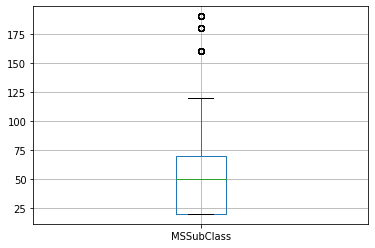

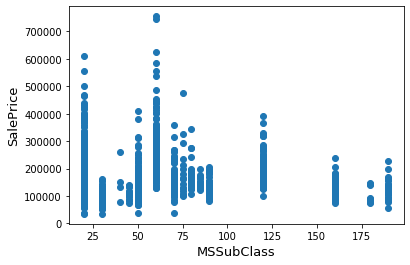

LotFrontage
min: 21.0, max: 313.0, mean: 70.04995836802665, median: nan


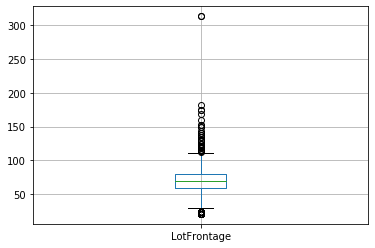

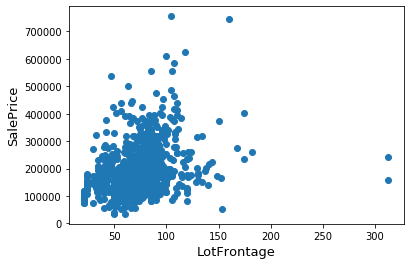

LotArea
min: 1300, max: 215245, mean: 10516.828082191782, median: 9478.5


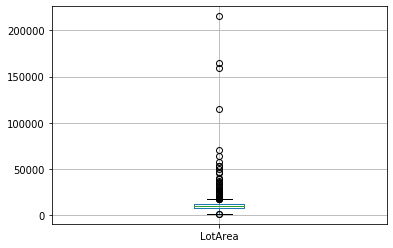

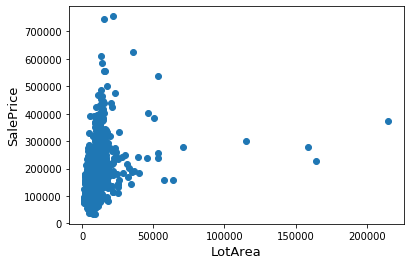

OverallQual
min: 1, max: 10, mean: 6.0993150684931505, median: 6.0


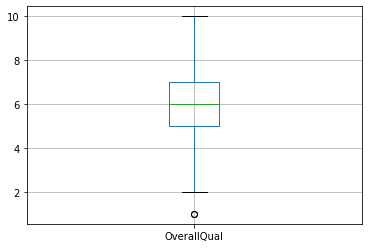

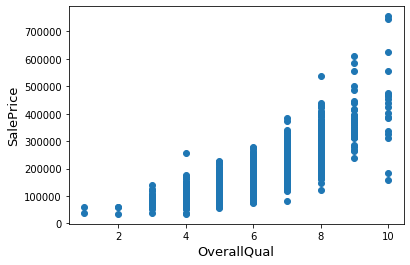

OverallCond
min: 1, max: 9, mean: 5.575342465753424, median: 5.0


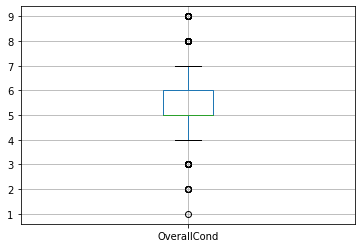

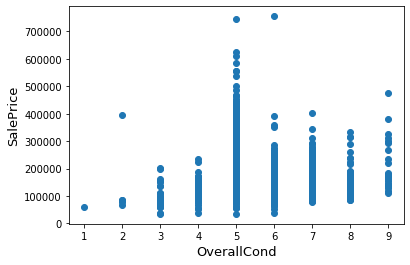

YearBuilt
min: 1872, max: 2010, mean: 1971.267808219178, median: 1973.0


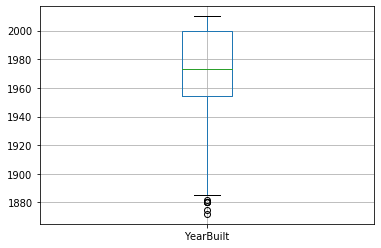

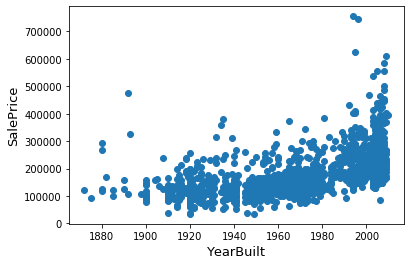

YearRemodAdd
min: 1950, max: 2010, mean: 1984.8657534246574, median: 1994.0


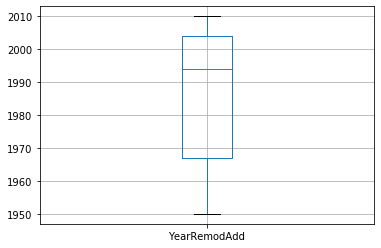

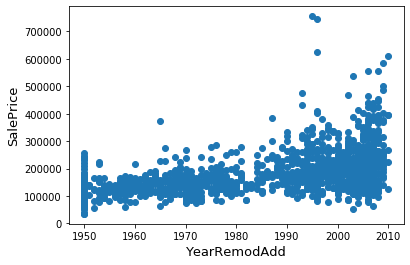

MasVnrArea
min: 0.0, max: 1600.0, mean: 103.68526170798899, median: nan


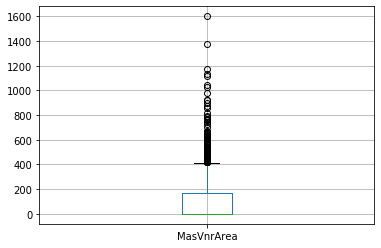

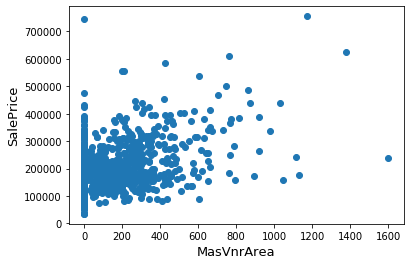

BsmtFinSF1
min: 0, max: 5644, mean: 443.6397260273973, median: 383.5


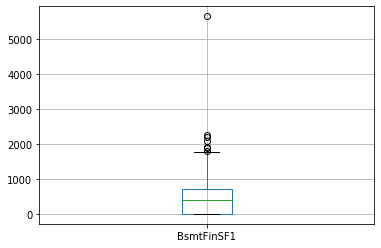

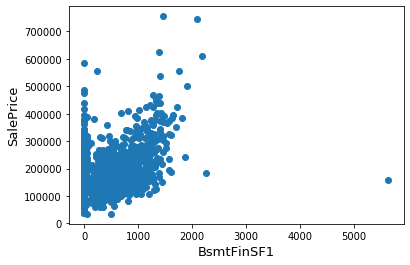

BsmtFinSF2
min: 0, max: 1474, mean: 46.54931506849315, median: 0.0


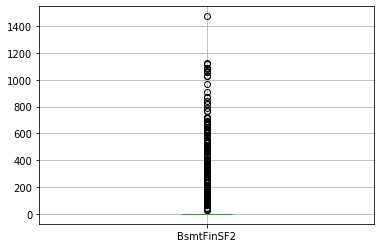

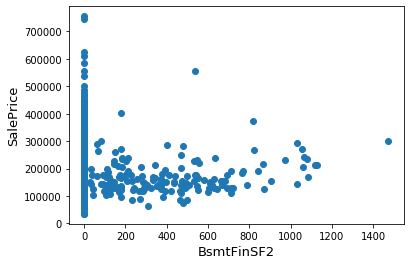

BsmtUnfSF
min: 0, max: 2336, mean: 567.2404109589041, median: 477.5


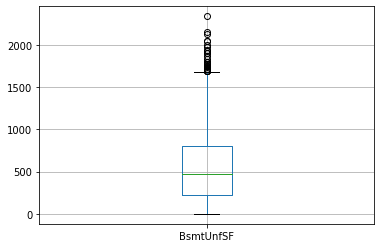

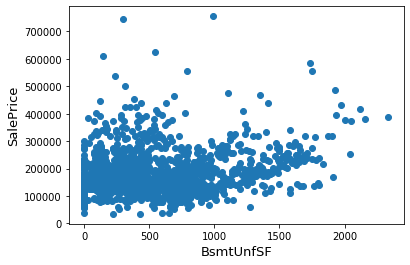

TotalBsmtSF
min: 0, max: 6110, mean: 1057.4294520547944, median: 991.5


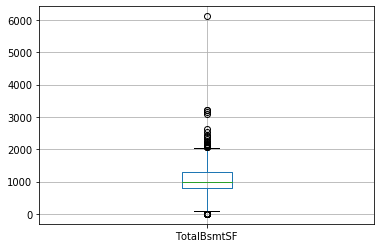

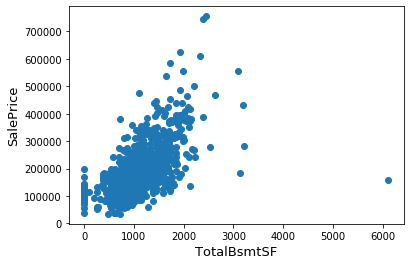

1stFlrSF
min: 334, max: 4692, mean: 1162.626712328767, median: 1087.0


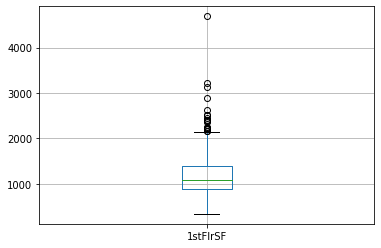

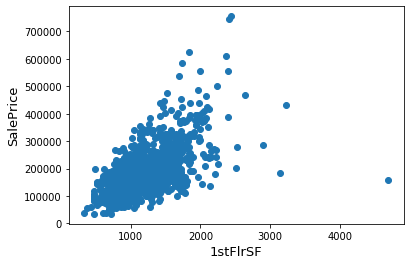

2ndFlrSF
min: 0, max: 2065, mean: 346.99246575342465, median: 0.0


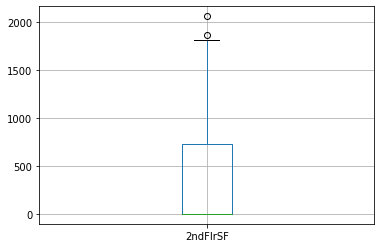

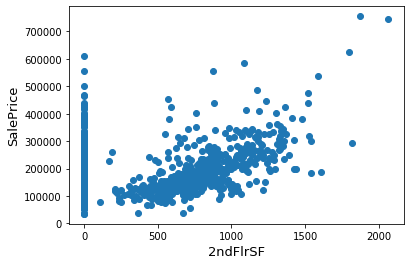

LowQualFinSF
min: 0, max: 572, mean: 5.844520547945206, median: 0.0


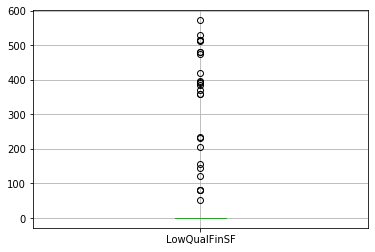

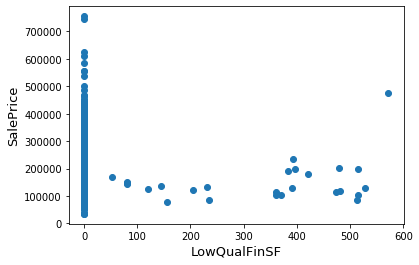

GrLivArea
min: 334, max: 5642, mean: 1515.463698630137, median: 1464.0


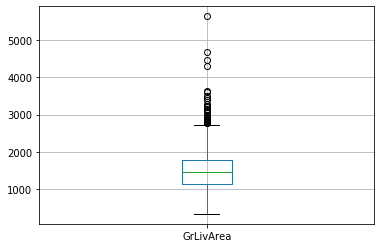

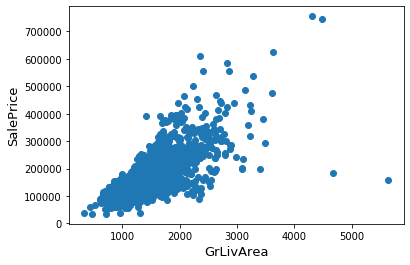

BsmtFullBath
min: 0, max: 3, mean: 0.42534246575342466, median: 0.0


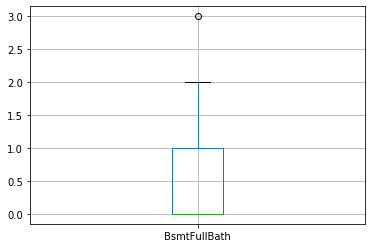

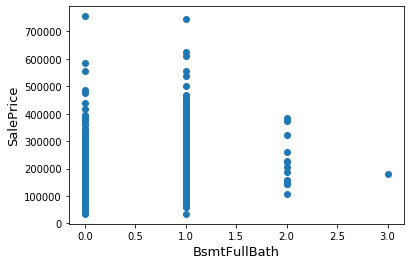

BsmtHalfBath
min: 0, max: 2, mean: 0.057534246575342465, median: 0.0


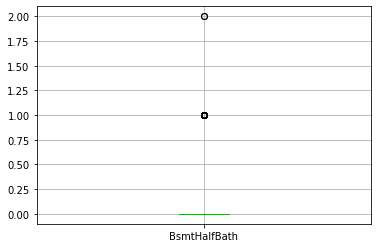

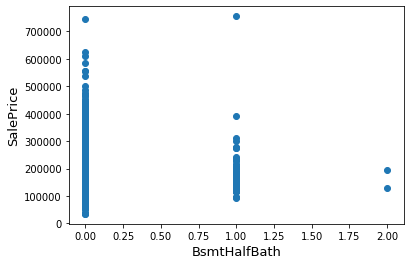

FullBath
min: 0, max: 3, mean: 1.5650684931506849, median: 2.0


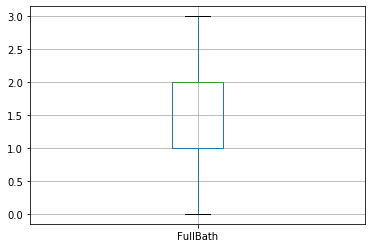

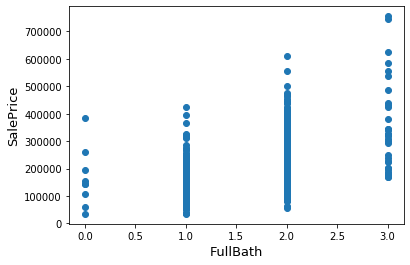

HalfBath
min: 0, max: 2, mean: 0.38287671232876713, median: 0.0


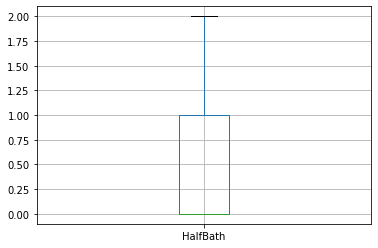

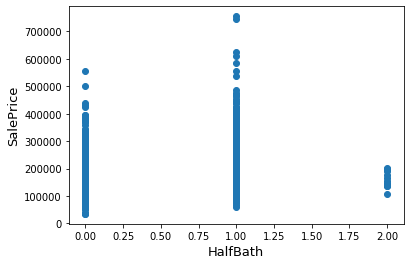

BedroomAbvGr
min: 0, max: 8, mean: 2.8664383561643834, median: 3.0


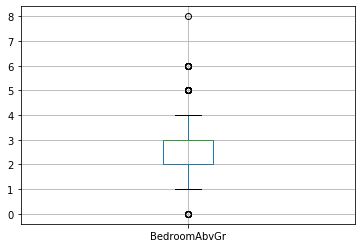

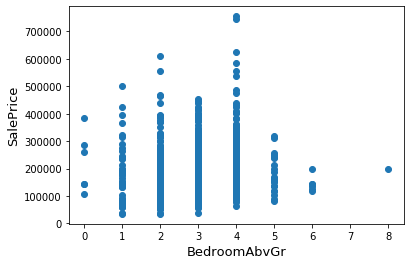

KitchenAbvGr
min: 0, max: 3, mean: 1.0465753424657533, median: 1.0


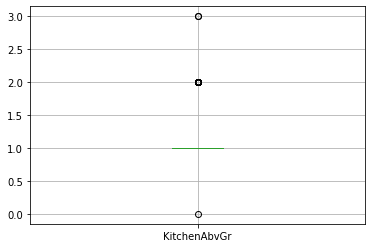

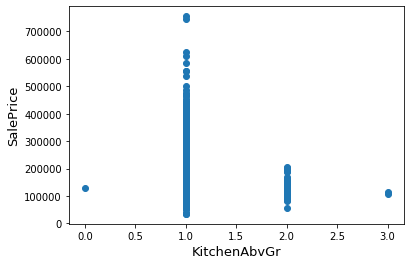

TotRmsAbvGrd
min: 2, max: 14, mean: 6.517808219178082, median: 6.0


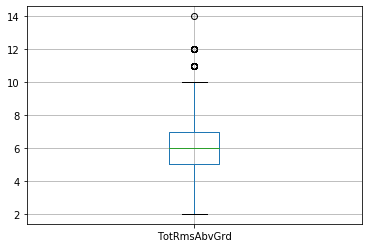

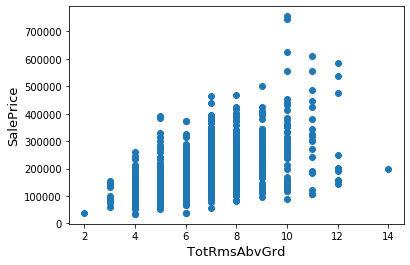

Fireplaces
min: 0, max: 3, mean: 0.613013698630137, median: 1.0


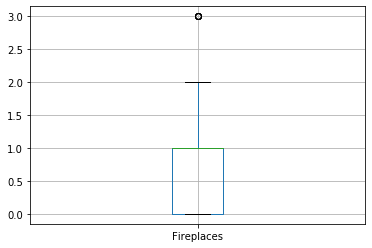

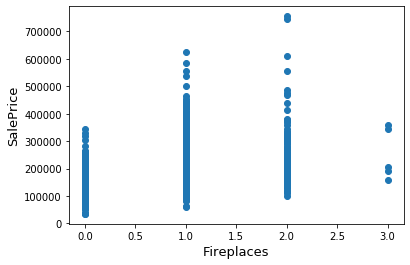

GarageYrBlt
min: 1900.0, max: 2010.0, mean: 1978.5061638868744, median: nan


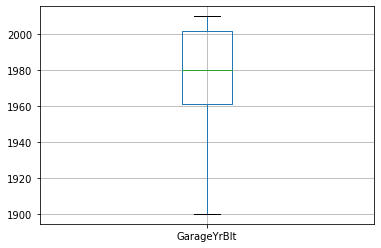

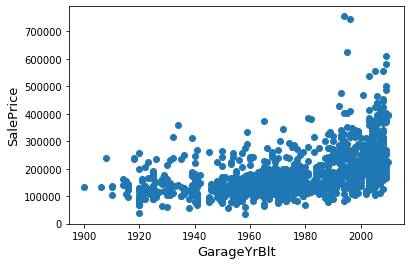

GarageCars
min: 0, max: 4, mean: 1.7671232876712328, median: 2.0


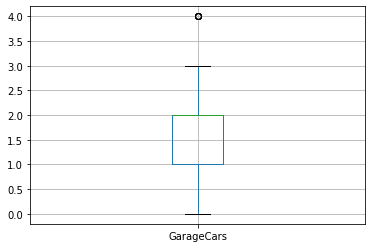

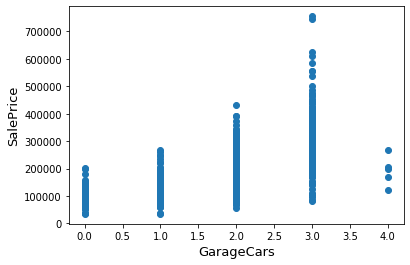

GarageArea
min: 0, max: 1418, mean: 472.9801369863014, median: 480.0


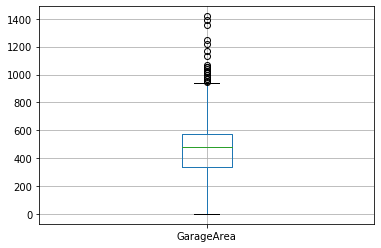

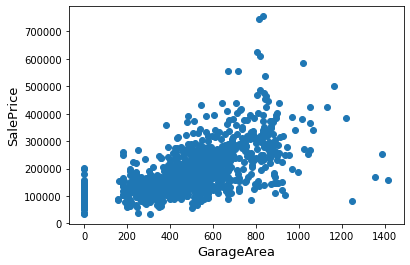

WoodDeckSF
min: 0, max: 857, mean: 94.2445205479452, median: 0.0


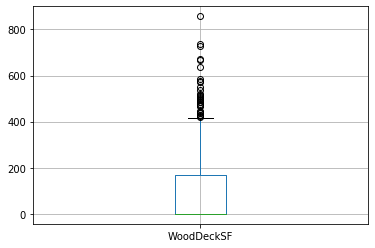

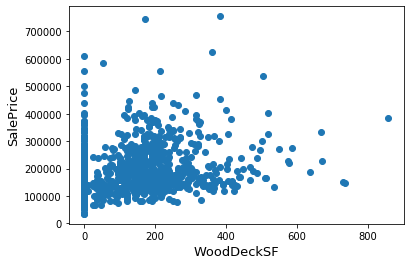

OpenPorchSF
min: 0, max: 547, mean: 46.66027397260274, median: 25.0


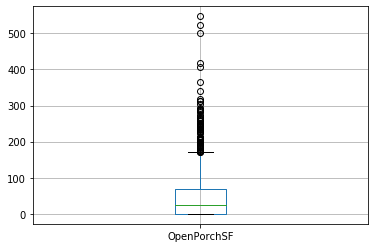

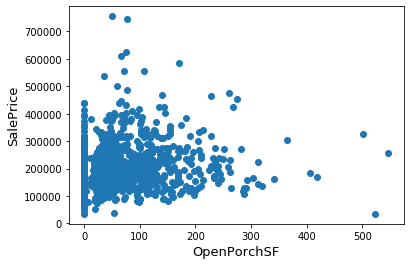

EnclosedPorch
min: 0, max: 552, mean: 21.954109589041096, median: 0.0


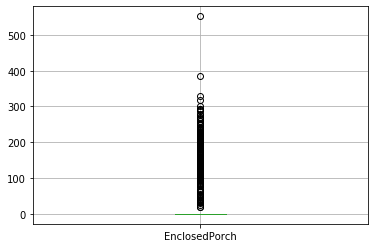

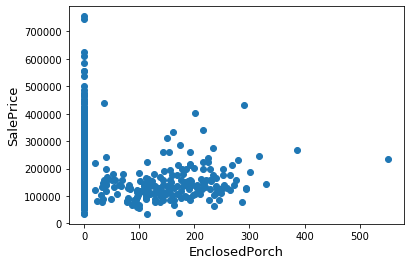

3SsnPorch
min: 0, max: 508, mean: 3.4095890410958902, median: 0.0


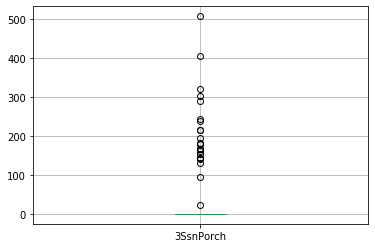

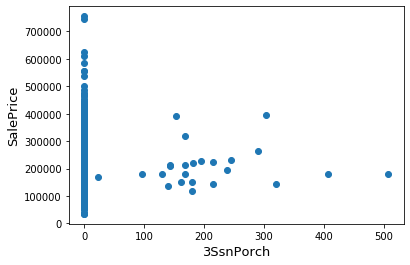

ScreenPorch
min: 0, max: 480, mean: 15.060958904109588, median: 0.0


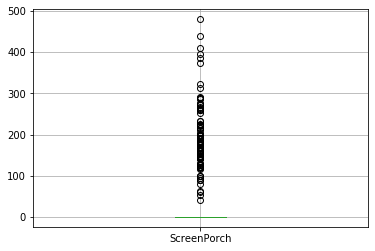

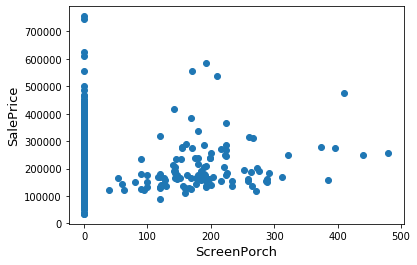

PoolArea
min: 0, max: 738, mean: 2.758904109589041, median: 0.0


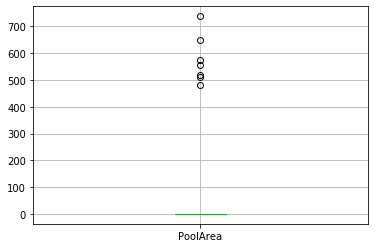

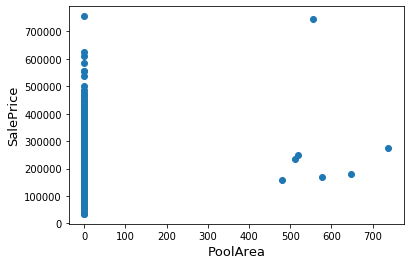

MiscVal
min: 0, max: 15500, mean: 43.489041095890414, median: 0.0


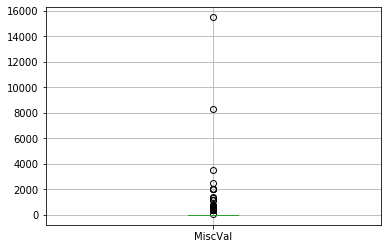

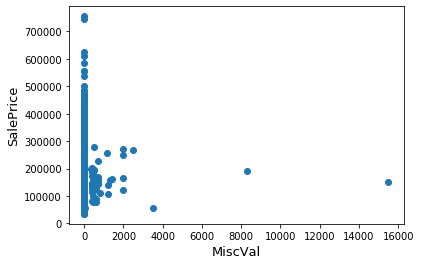

MoSold
min: 1, max: 12, mean: 6.321917808219178, median: 6.0


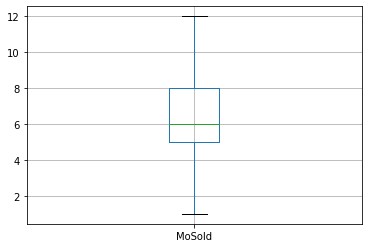

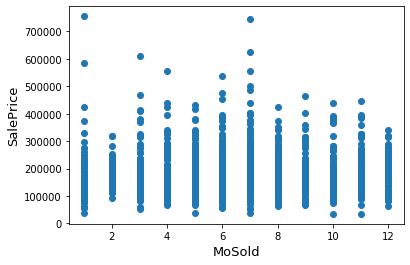

YrSold
min: 2006, max: 2010, mean: 2007.8157534246575, median: 2008.0


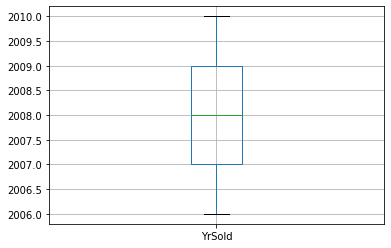

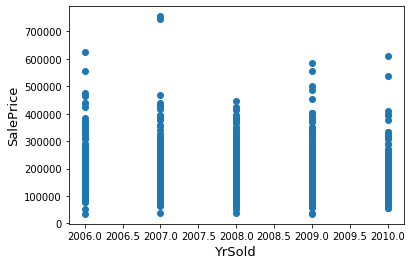

SalePrice
min: 34900, max: 755000, mean: 180921.19589041095, median: 163000.0


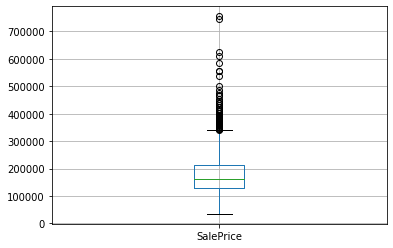

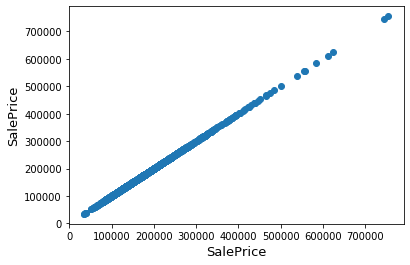

In [178]:
for col in numericals:
    print(col)
    print("min: {}, max: {}, mean: {}, median: {}".
          format(min(train[col]), max(train[col]), np.mean(train[col]), np.median(train[col])))
    train.boxplot(column=[col])
    # plt.show()
    fig, ax = plt.subplots()
    ax.scatter(x = train[col], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(col, fontsize=13)
    plt.show()
    

### Outliers

In [180]:
new_train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
new_train = train.drop(train[(train['GrLivArea']>500) & (train['SalePrice']<100000)].index)
new_train = new_train.drop(new_train[new_train['LotFrontage']>300].index)
new_train = new_train.drop(new_train[new_train['BsmtFinSF1']>5000].index)
new_train = new_train.drop(new_train[new_train['TotalBsmtSF']>6000].index)
new_train = new_train.drop(new_train[new_train['1stFlrSF']>4000].index)
new_train = new_train.drop(new_train[(new_train['GrLivArea']>500) & (new_train['SalePrice']<100000)].index)

MSSubClass


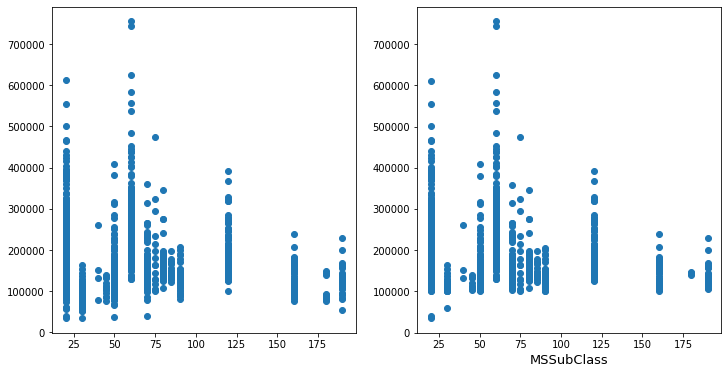

LotFrontage


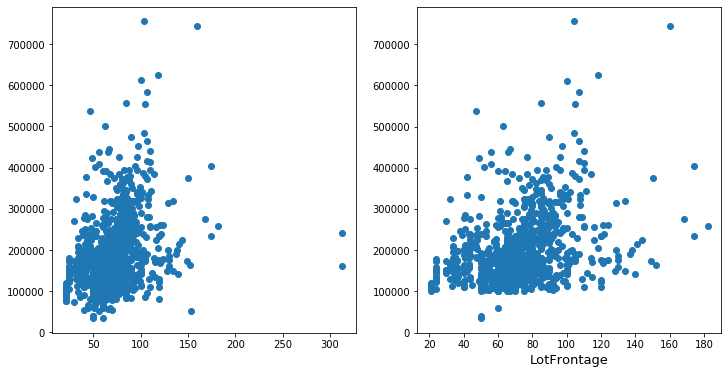

LotArea


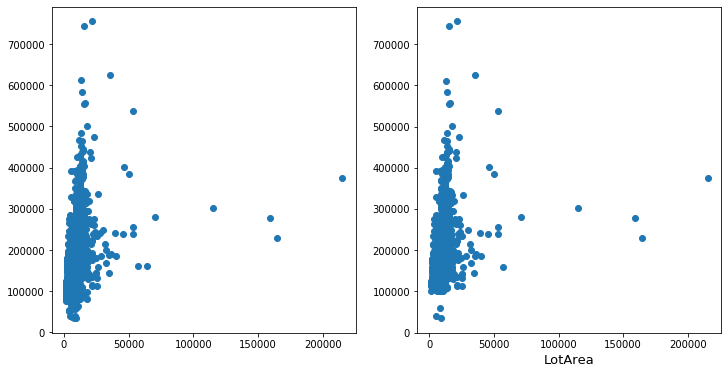

OverallQual


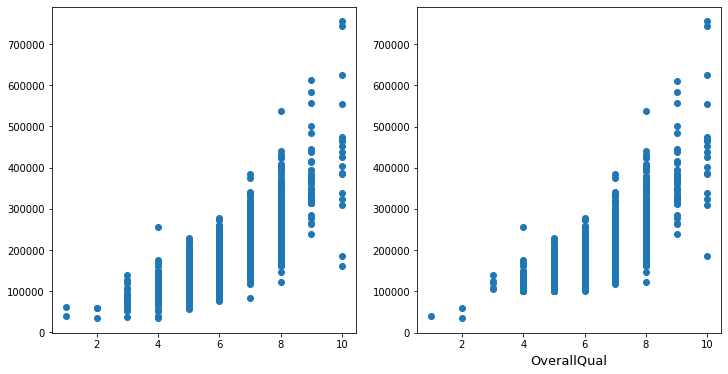

OverallCond


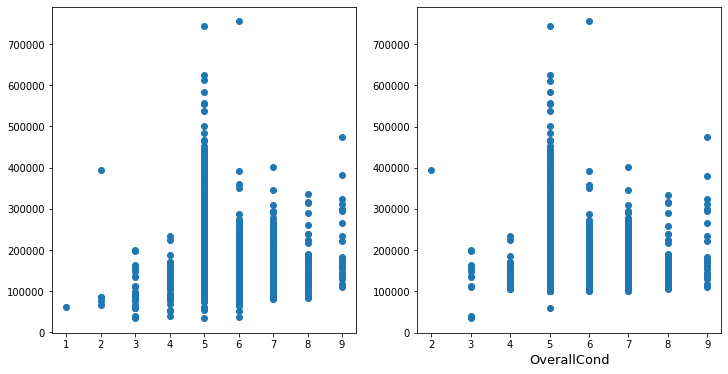

YearBuilt


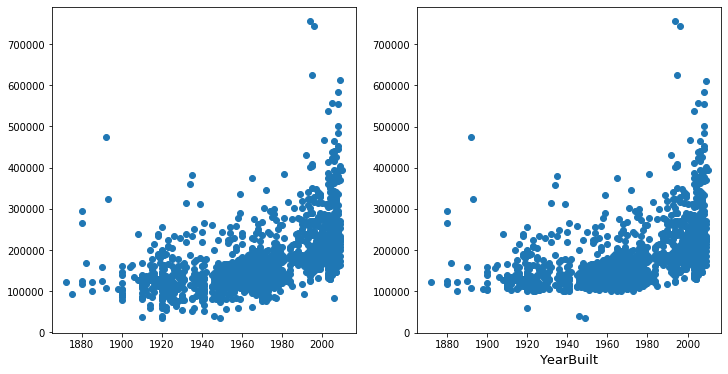

YearRemodAdd


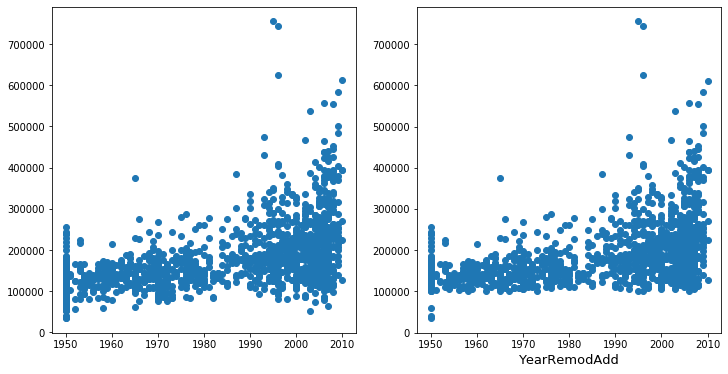

MasVnrArea


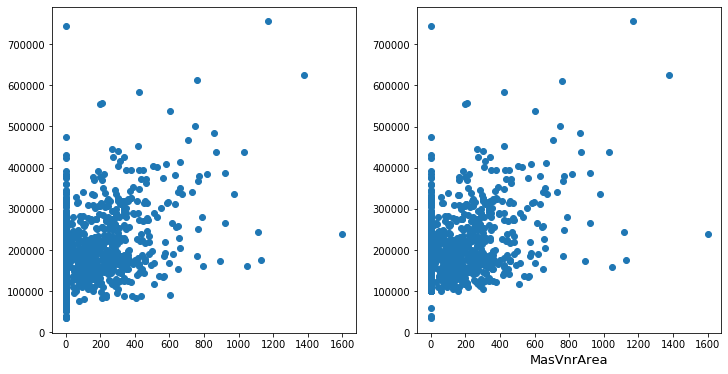

BsmtFinSF1


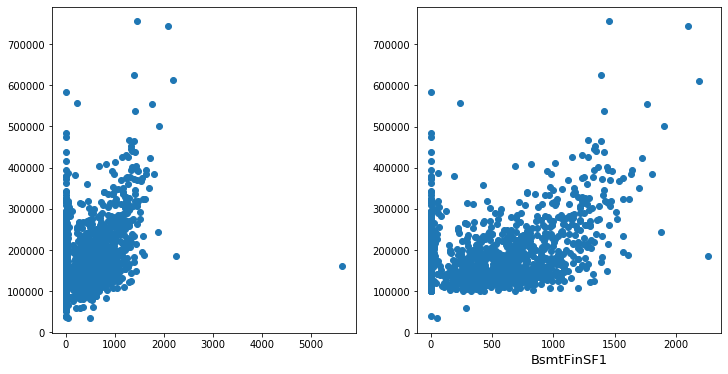

BsmtFinSF2


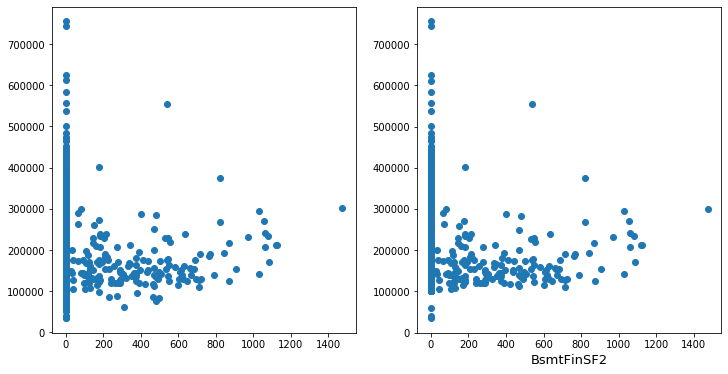

BsmtUnfSF


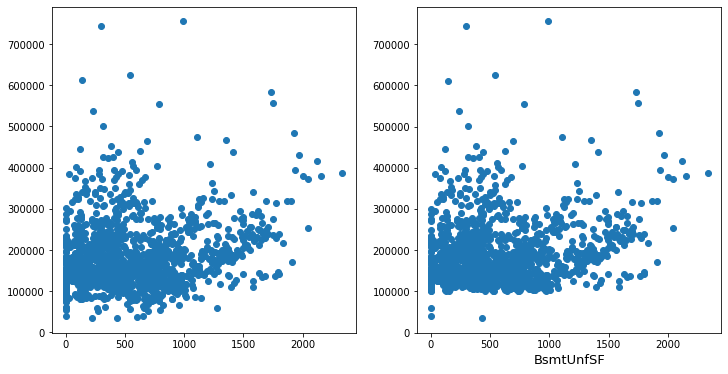

TotalBsmtSF


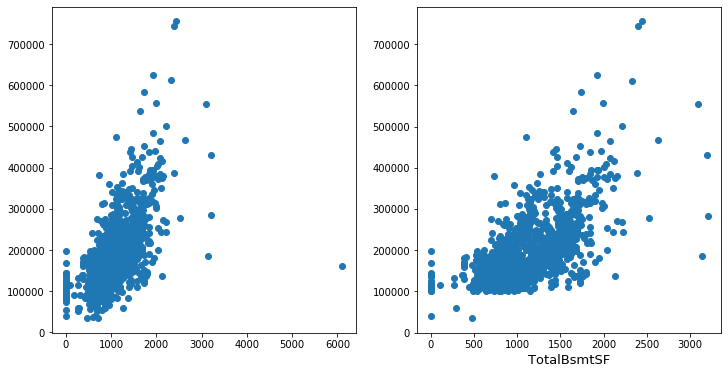

1stFlrSF


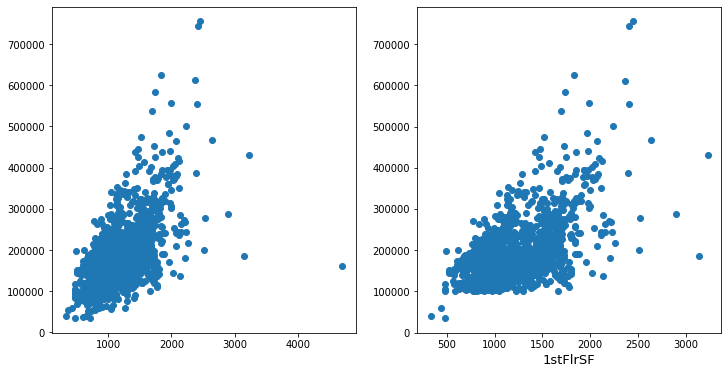

2ndFlrSF


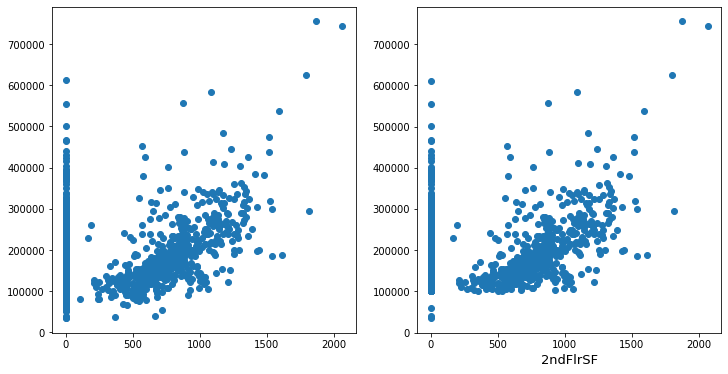

LowQualFinSF


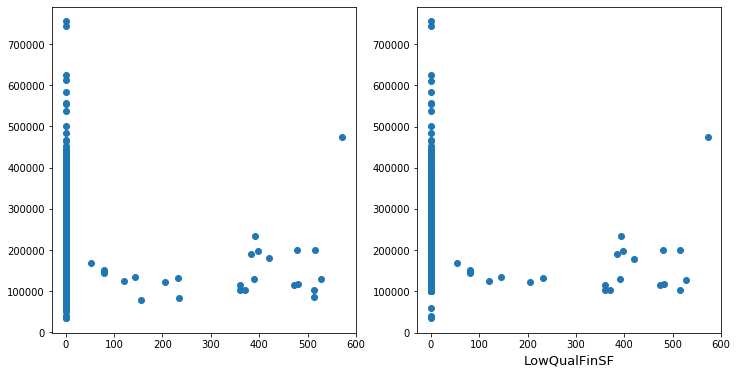

GrLivArea


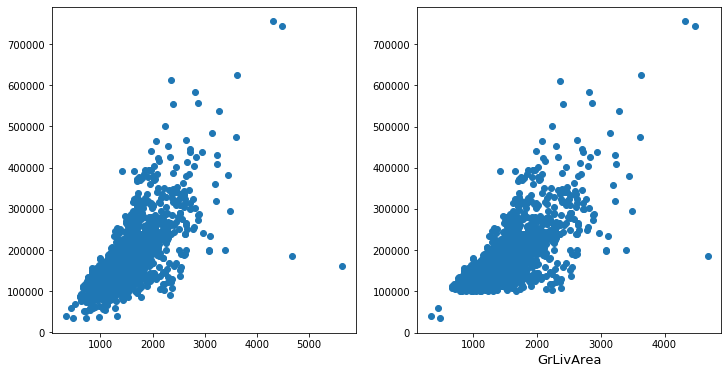

BsmtFullBath


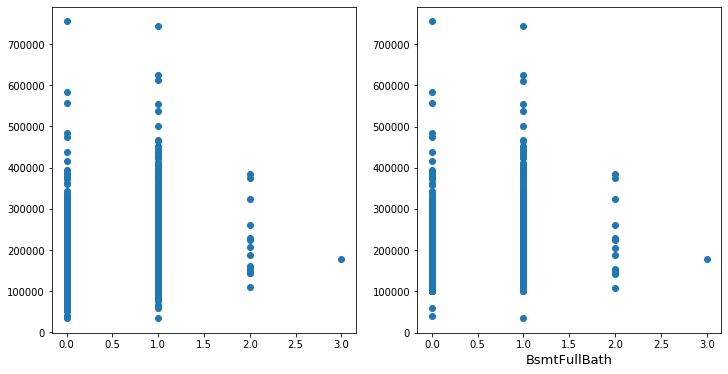

BsmtHalfBath


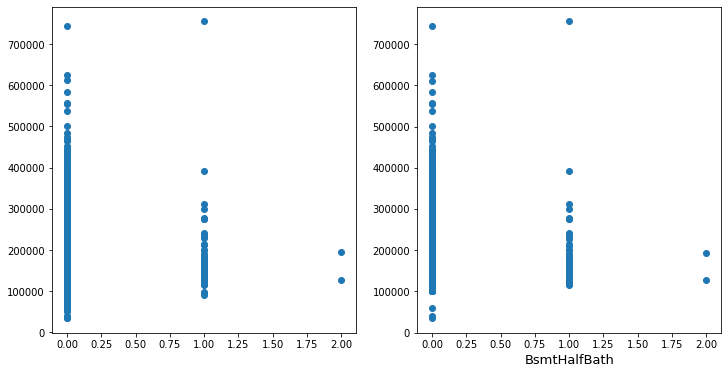

FullBath


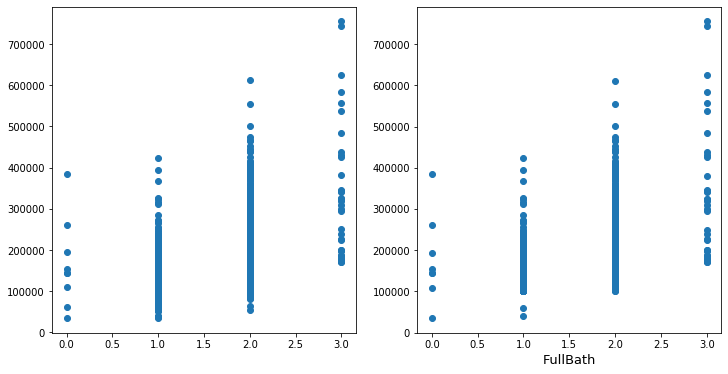

HalfBath


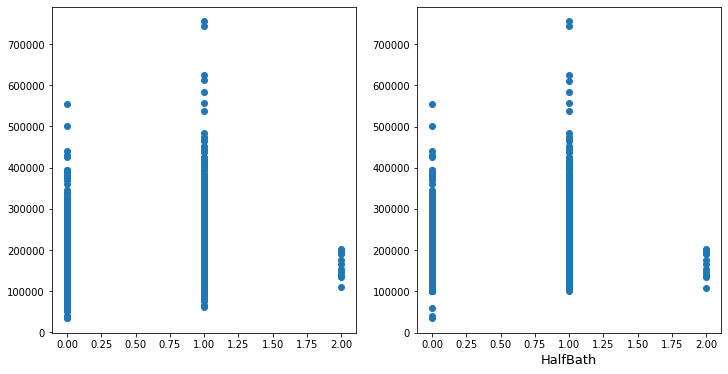

BedroomAbvGr


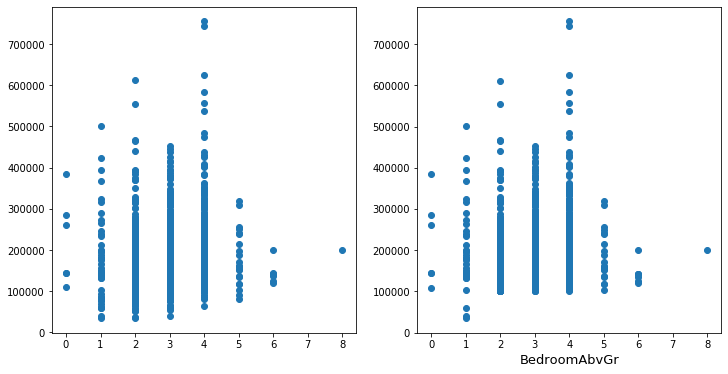

KitchenAbvGr


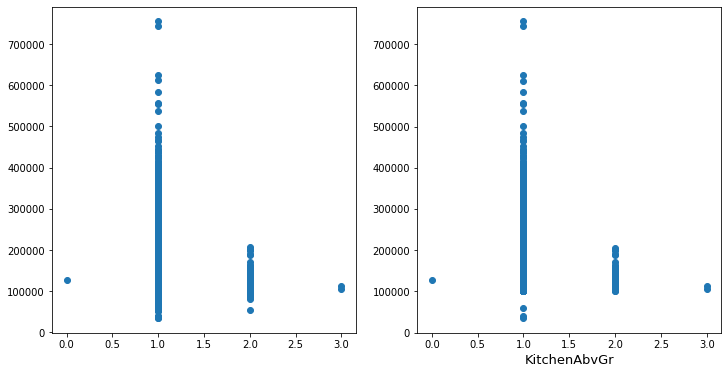

TotRmsAbvGrd


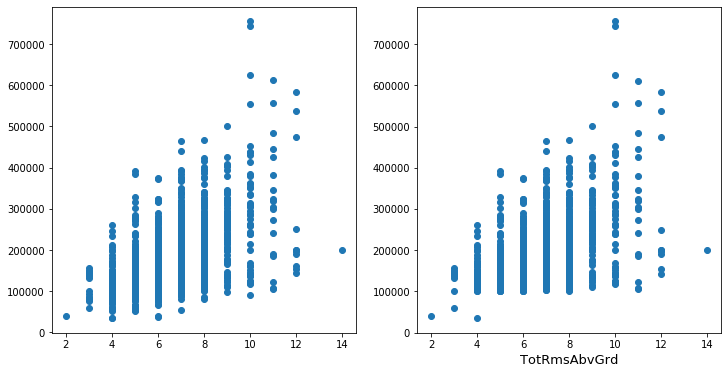

Fireplaces


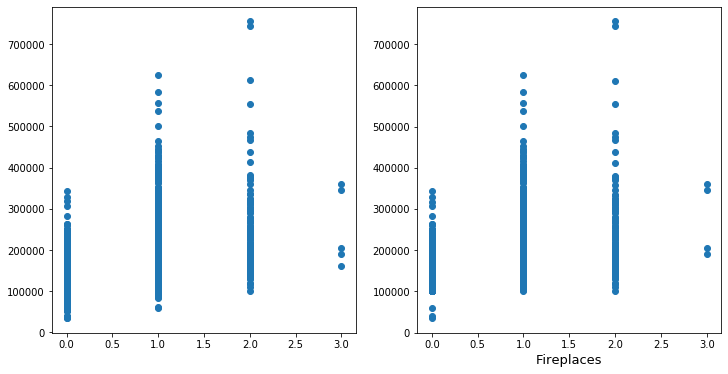

GarageYrBlt


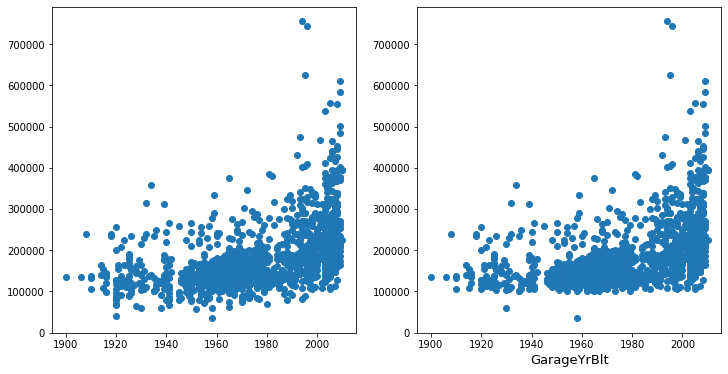

GarageCars


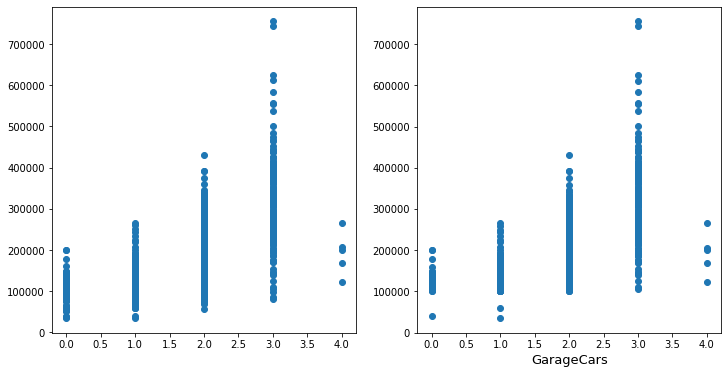

GarageArea


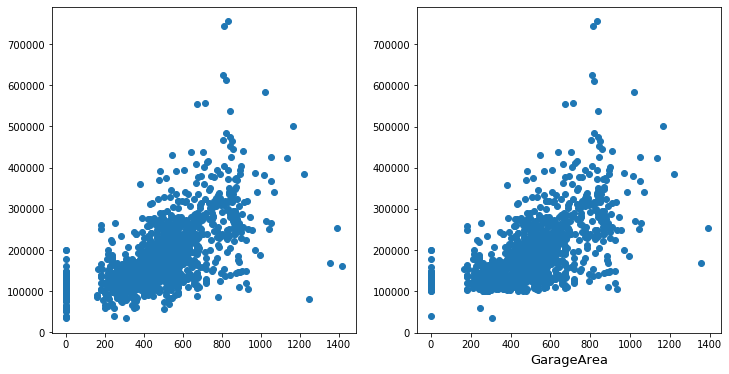

WoodDeckSF


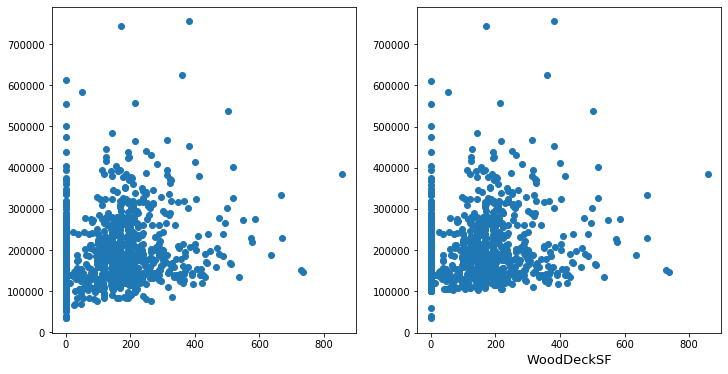

OpenPorchSF


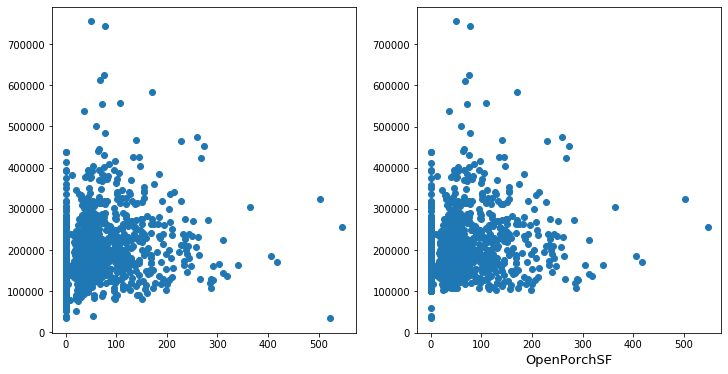

EnclosedPorch


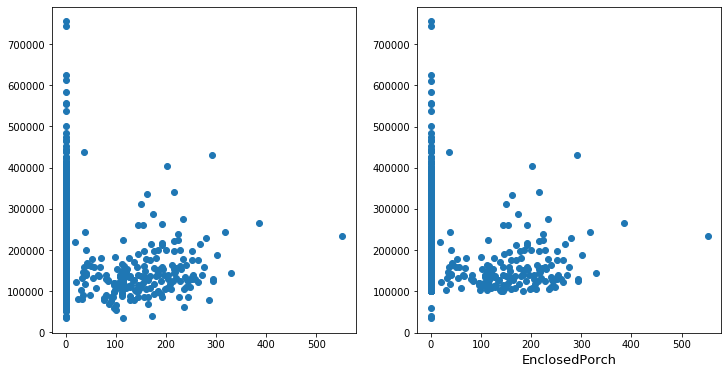

3SsnPorch


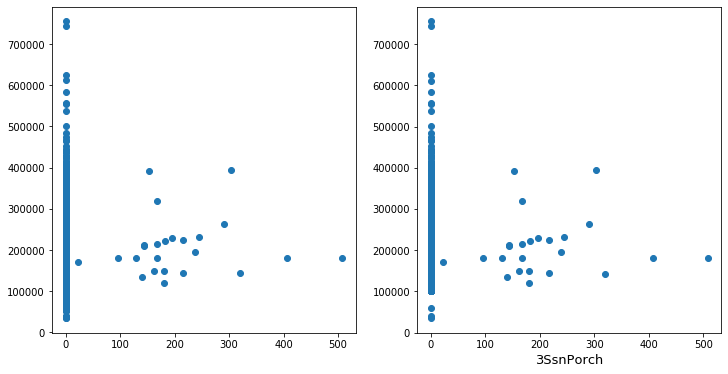

ScreenPorch


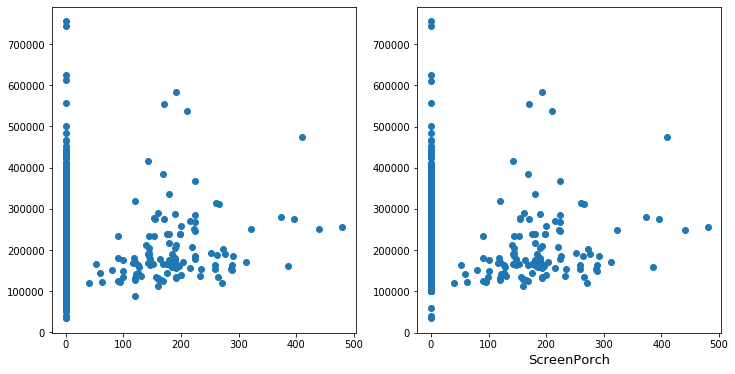

PoolArea


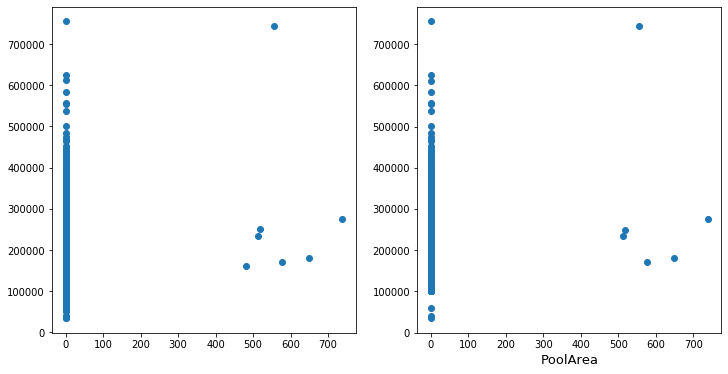

MiscVal


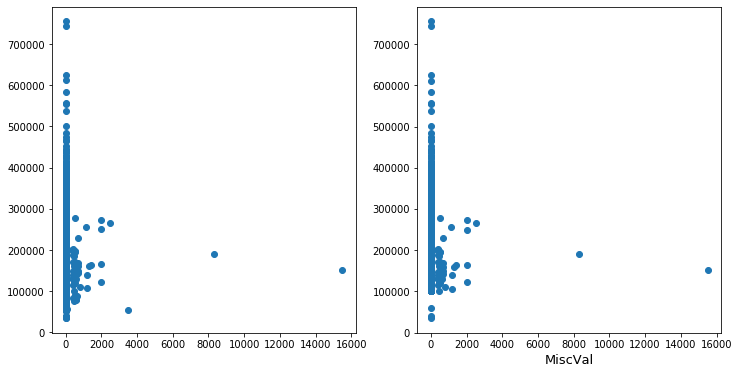

MoSold


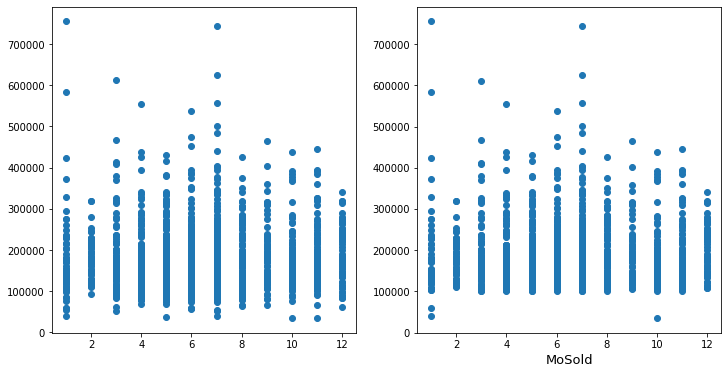

YrSold


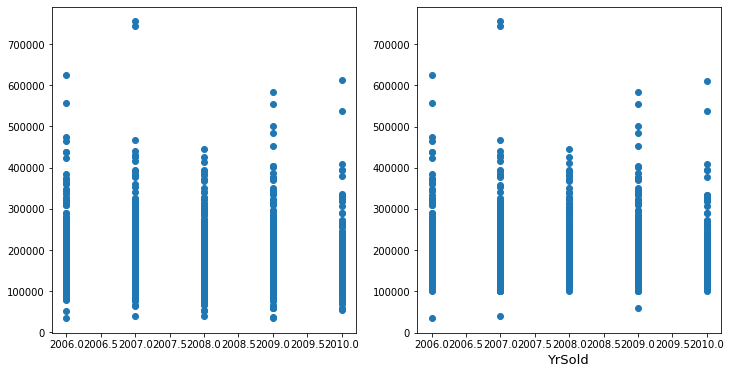

SalePrice


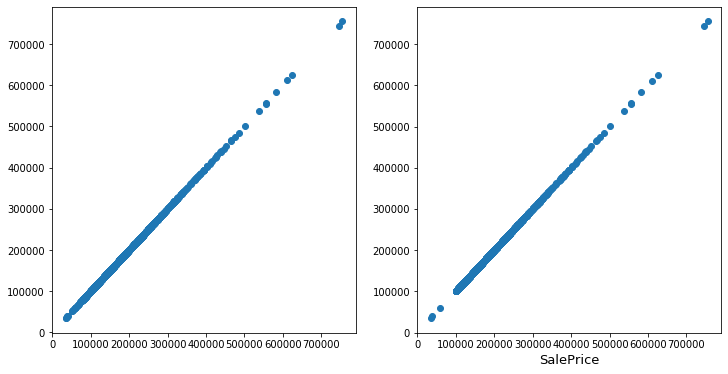

In [184]:
for col in numericals:
    print(col)
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(12,6)

    ax1.scatter(train[col], train['SalePrice'])
    plt.xlabel(col, fontsize=13)

    #Check the graphic again
    ax2.scatter(new_train[col], new_train['SalePrice'])
    plt.xlabel(col, fontsize=13)
    plt.show()

In [ ]:
from scipy import stats

x = new_train["LotFrontage"]
y = train["Saleprice"]

slope, intercept, r_value, p_value

## Categorical

In [135]:
for col in nan_cate:
    print(col)
    print(df_all[col].value_counts())
    print("train: ", train[col].isna().sum())
    print("test: ", test[col].isna().sum())
    print("all: ", df_all[col].isna().sum(), "\n")

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
train:  0
test:  4
all:  4 

Alley
Grvl    120
Pave     78
Name: Alley, dtype: int64
train:  1369
test:  1352
all:  2721 

Utilities
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
train:  0
test:  2
all:  2 

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64
train:  0
test:  1
all:  1 

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
train:  0
test:  1
all:  1 

MasVnrType
None   

#### MSZoning
NA $\rightarrow$ RL (the most common value)

#### Alley
NA $\rightarrow$ NODATA (which means the property is no beside alley)

#### Utilities
**remove this column** (because there are 2 kind of values and NoSeWa is only 1 side trian or test)

#### Exterior1st, Exterior2nd
NA $\rightarrow$ VinylSd (the most common value)

#### MasVnrType
NA $\rightarrow$ NONE (the most common value)

#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
NA $\rightarrow$ NONE (there is no basement)

#### Electrical
NA $\rightarrow$ SBrkr (the most common value)

#### KitchenQual
NA $\rightarrow$ TA (the most common value)

#### Functional 
NA $\rightarrow$ Typ (the most common value)

#### FireplaceQu
NA $\rightarrow$ NONE (No fireplace)

#### GarageType, GarageFinish, GarageQual, GarageCond
NA $\rightarrow$ NONE (No garage)

#### PoolQC
NA $\rightarrow$ NONE (No pool)

#### Fence
NA $\rightarrow$ NONE (No fence)

#### MiscFeature
NA $\rightarrow$ NONE (No Misc)

#### SaleType
NA $\rightarrow$ WD (the most common value)


# Distribution of target variable

/Users/kentaro88/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


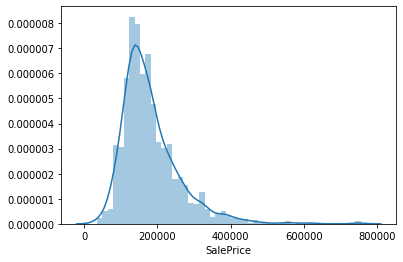

In [12]:
sns.distplot(train['SalePrice'] )

/Users/kentaro88/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


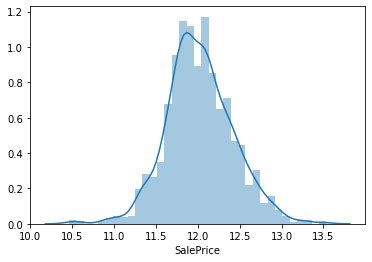

In [13]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'])

# Interactions with target variable

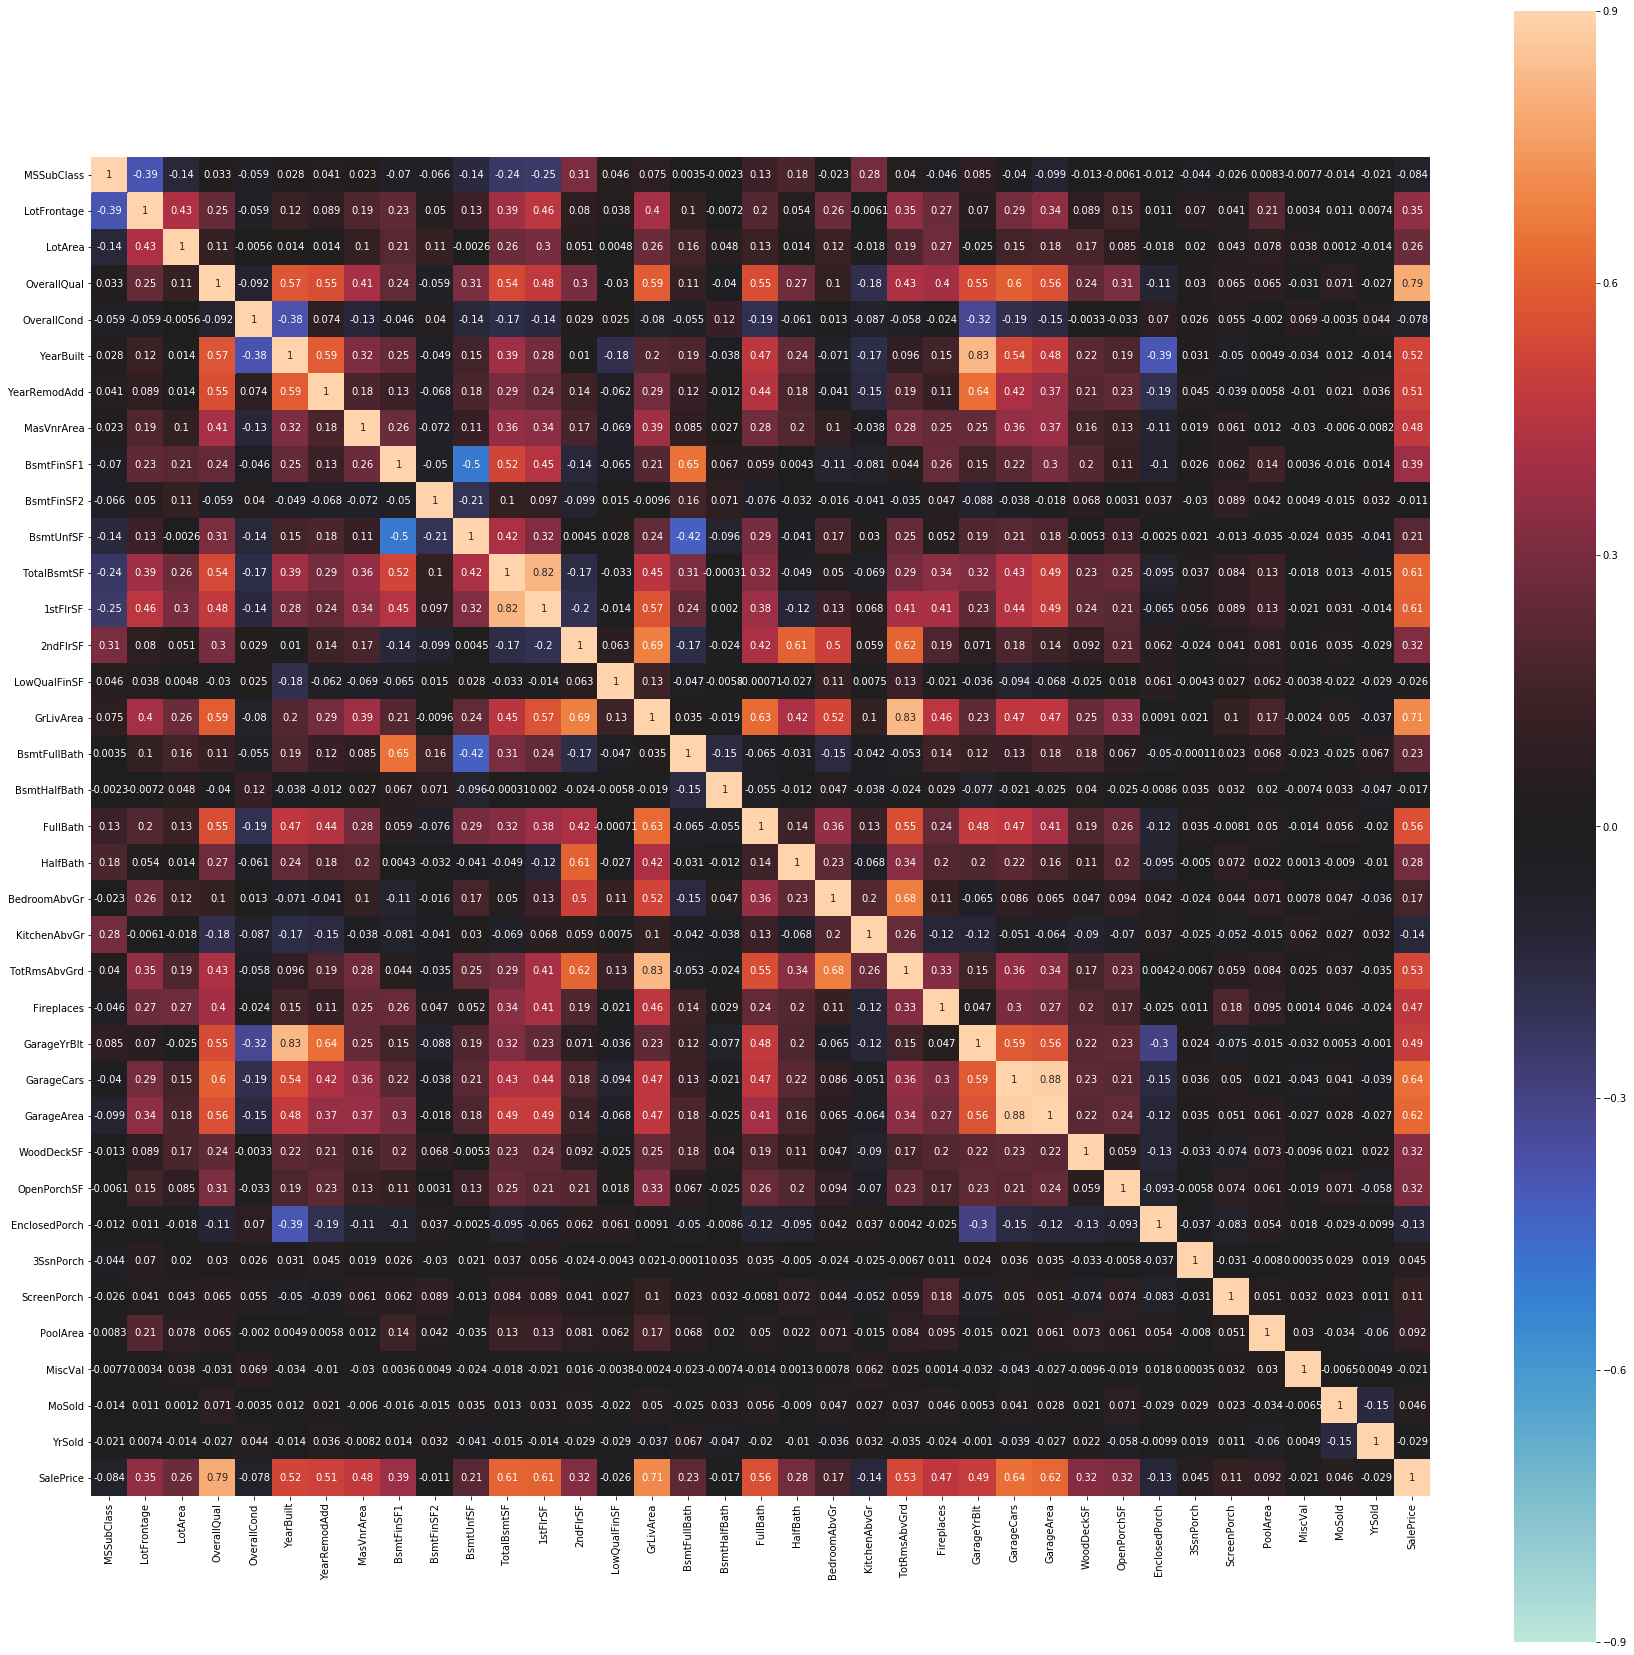

In [120]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(30, 30))
sns.heatmap(corrmat, vmax=0.9, vmin=-0.9, center=0, annot=True, square=True)